## Matplotlib
Is a library for data visualization. 

In [ ]:
! pip install matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

time.localtime()


In [ ]:
rainfall = pd.read_csv('../_data/samples/india_rainfall_data.csv')
rainfall.head(13)

#### Type of Graphs

**Line Plot**: Trend analysis on time-series data.

**Bar Plot**: Is used for comparision using categorical values. (E.g. find the volume of students by their grade (A+, A, B, C))

**Scatter Plot**: Is to find the data relationships strength. 

**Pie Chart**: Breakdown of entire population (complete data)

**Box Plot**: Is used to find the outliers.

**Histogram**: Is used for frequency distribution. X-axis: Bins or Intervals (E.g. rainfall from 0-10mm, 11-20mm, 21-30 mm etc..)


In [ ]:
rainfall.columns

In [104]:
# Assuming df is your original DataFrame
# Step 1: Pivot the table
pivot_df = rainfall.pivot_table(
    index=['State', 'Year'],
    columns='Month',
    values='Rainfall_mm',
    aggfunc='sum'  # In case of duplicates
)

# 🚨 Fix: Remove the columns' name (MultiIndex root cause)
pivot_df.columns.name = None

# Step 2: Fix column ordering (Jan, Feb, ..., Dec)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

pivot_df = pivot_df[month_order]


# Step 3: Add the Annual total
pivot_df['Annual'] = pivot_df.sum(axis=1)

# Step 4: Reset index if you want 'State' and 'Year' as columns
pivot_df = pivot_df.reset_index()

# pivot_df

state_rain_df = pivot_df[pivot_df.State == 'Andhra Pradesh']
state_rain_df.set_index('Year', inplace=True)
# state_rain_df = state_rain_df.reset_index()


# # Step 1: Flatten the column headers
# state_rain_df.columns.name = None  # Remove top-level name like 'Month'

# # Step 2: Move 'Year' index into a column
# # state_rain_df = state_rain_df.reset_index()
# state_rain_df.set_index('Year', inplace=True)

state_rain_df


,State,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Year,,,,,,,,,,,,,,
2005,Andhra Pradesh,141.16,63.58,174.94,156.10,122.43,173.67,41.09,54.35,147.40,71.18,47.45,103.47,1296.82
2006,Andhra Pradesh,73.13,99.99,63.09,202.75,81.99,104.53,92.54,38.76,56.50,38.26,42.40,182.21,1076.15
2007,Andhra Pradesh,105.68,160.52,101.61,148.19,59.01,69.25,112.66,56.23,186.08,87.50,158.39,63.55,1308.67
2008,Andhra Pradesh,123.67,79.68,66.27,172.05,42.22,154.70,124.94,44.30,123.56,78.61,66.78,75.43,1152.21
2009,Andhra Pradesh,49.79,23.90,203.26,102.15,209.86,55.11,85.39,43.80,121.12,93.26,72.49,41.85,1101.98
2010,Andhra Pradesh,99.68,164.37,113.54,161.29,186.13,96.14,68.36,124.32,122.72,109.55,130.12,69.44,1445.66
2011,Andhra Pradesh,67.14,150.07,78.08,116.13,98.43,87.72,126.69,111.94,80.70,147.30,97.72,116.57,1278.49
2012,Andhra Pradesh,53.06,51.32,42.84,92.14,54.22,89.41,172.37,61.12,99.35,93.58,40.34,59.59,909.34
2013,Andhra Pradesh,45.82,85.84,210.67,67.25,75.34,51.49,82.63,209.80,112.69,80.73,190.06,153.16,1365.48


In [ ]:
state_rain_df.info()

#### Year wise annual rain trend

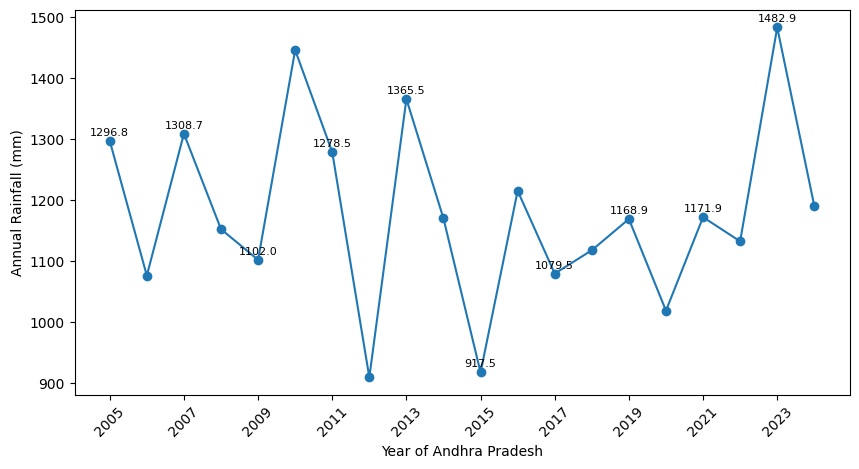

In [105]:
# state_rain_df['Annual'].loc[2010:2024]
# plt.plot(state_rain_df['Annual'].loc["2005":"2024"])

subset = state_rain_df.loc[2005:2024]  # assuming Year is the index and int

plt.figure(figsize=(10, 5))  # Optional: wider figure
plt.plot(subset.index, subset['Annual'], marker='o')  # specify x and y


plt.xlabel('Year of Andhra Pradesh')
plt.ylabel('Annual Rainfall (mm)')

# plt.xticks(subset.index)  # force x-ticks to be the year integers

# Show only alternate x-axis labels
xticks_to_show = subset.index[::2]  # every 2nd year
plt.xticks(xticks_to_show, rotation=45)

# Optional: Show data values at each point
for x, y in zip(subset.index, subset['Annual']):
    if x in xticks_to_show:  # Only label alternate years
        plt.text(x, y + 5, f'{y:.1f}', ha='center', va='bottom', fontsize=8)

# plt.grid(True)
# plt.tight_layout()
plt.show()

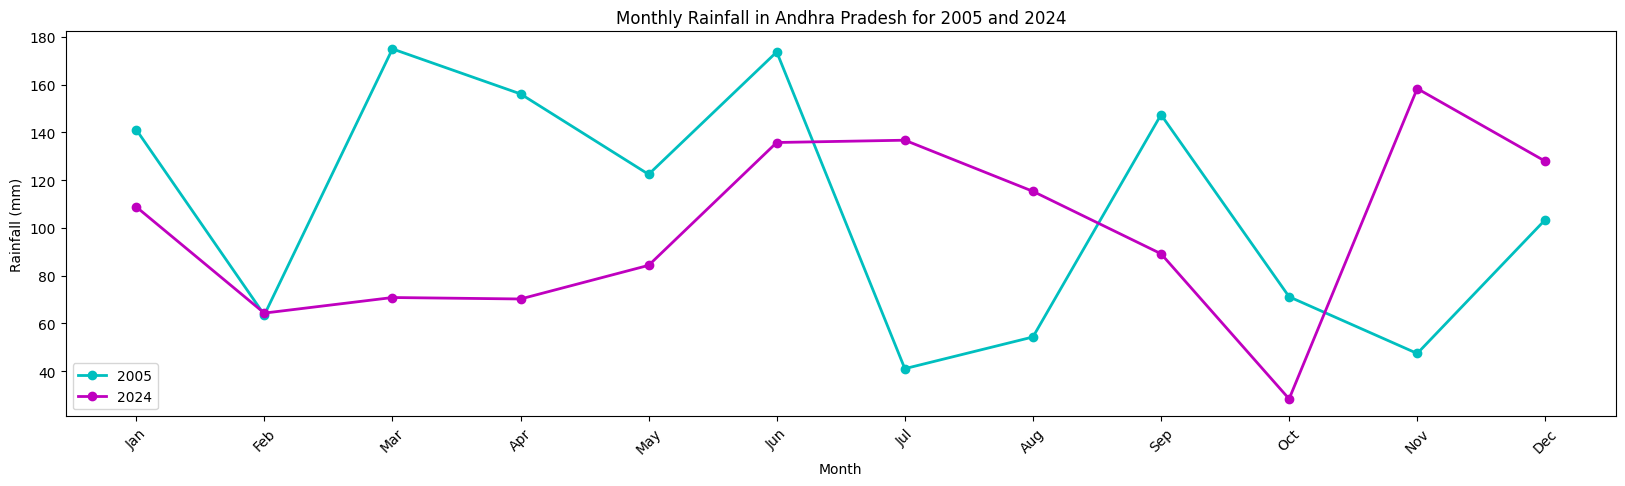

In [127]:
plt.figure(figsize=(20, 5))


plt.plot(state_rain_df.loc[2005, 'Jan':'Dec'], marker='o', label='2005', linewidth=2, color='c')
plt.plot(state_rain_df.loc[2024, 'Jan':'Dec'], marker='o', label='2024', linewidth=2, color='m')

plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.title('Monthly Rainfall in Andhra Pradesh for 2005 and 2024')

# xticks_to_show = state_rain_df.index[::1]  # every 2nd month
# plt.xticks(xticks_to_show, rotation=45)

plt.xticks(rotation=45)
plt.legend(loc='lower left')  # ✅ Required to show labels

plt.show()




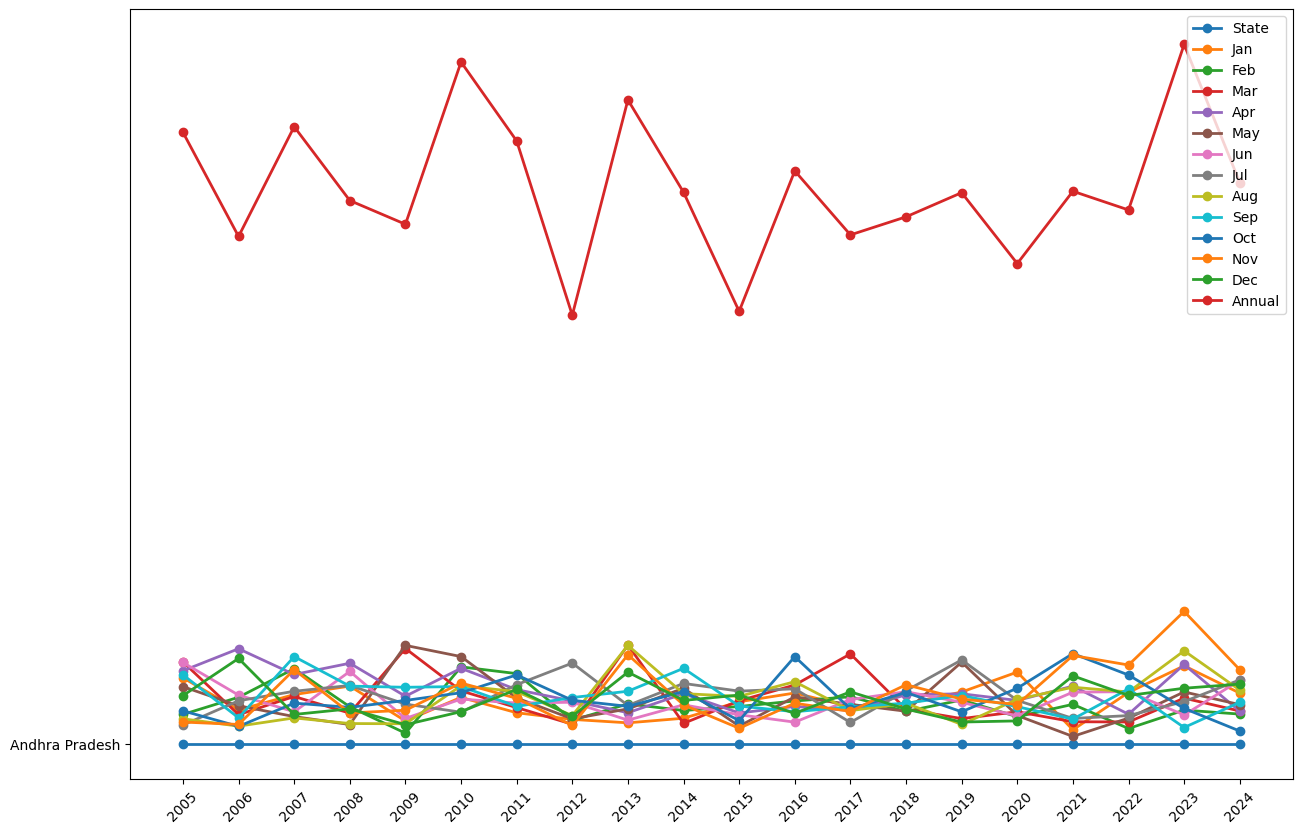

In [ ]:

plt.figure(figsize=(15, 10))
# Show only alternate x-axis labels
xticks_to_show = state_rain_df.index[::1]  # every 2nd year
plt.xticks(xticks_to_show, rotation=45)
for i in state_rain_df.columns:
    plt.plot(state_rain_df[i], marker='o', label=i, linewidth=2)

plt.legend(loc='upper right')  # ✅ Required to show labels
plt.show()

In [ ]:
state_rain_df.drop(columns=['State'], inplace=True) 

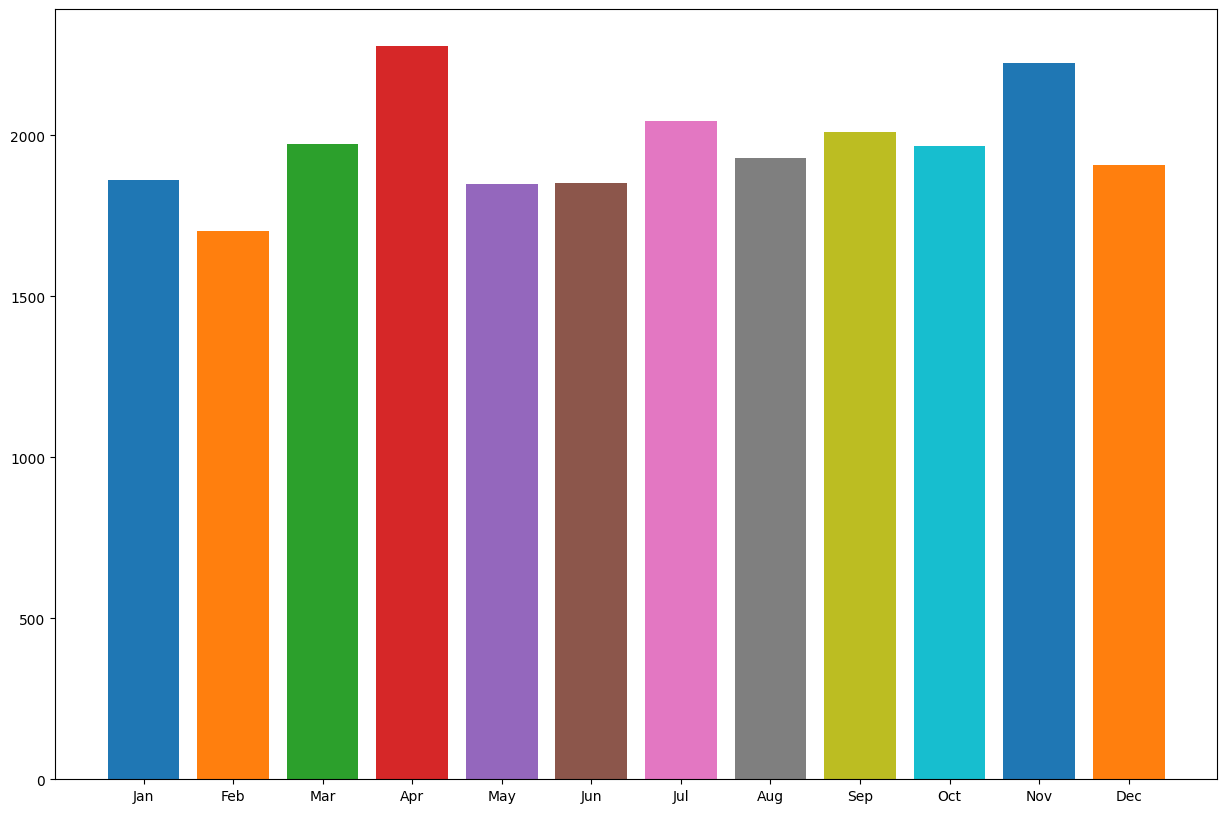

In [146]:
## Plot BAR Chart

plt.figure(figsize=(15, 10))
# Show only alternate x-axis labels
# xticks_to_show = state_rain_df.index[::1]  # every 2nd year
# plt.xticks(xticks_to_show, rotation=45)
 # Drop non-month columns for bar chart
# print(state_rain_df.columns)
for i in state_rain_df.columns:
    if i != 'Annual':
        # plt.plot(state_rain_df[i], marker='o', label=i, linewidth=2)
        # Use bar chart for each month
        plt.bar(i, state_rain_df[i].sum(), label=i)
    #plt.bar(i, state_rain_df[i].sum())  

# plt.legend(loc='upper right')  # ✅ Required to show labels
plt.show()

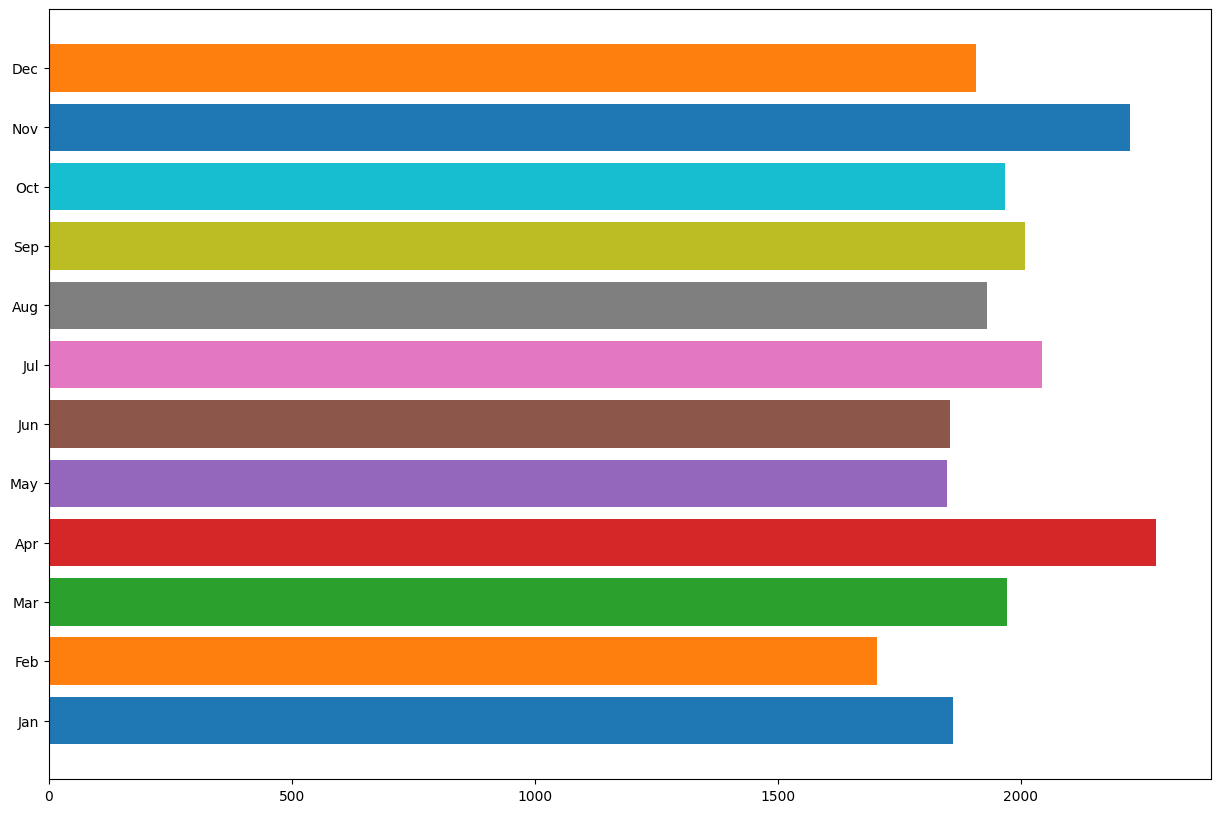

In [147]:
## Plot BAR Chart

plt.figure(figsize=(15, 10))
# Show only alternate x-axis labels
# xticks_to_show = state_rain_df.index[::1]  # every 2nd year
# plt.xticks(xticks_to_show, rotation=45)
 # Drop non-month columns for bar chart
# print(state_rain_df.columns)
for i in state_rain_df.columns:
    if i != 'Annual':
        # plt.plot(state_rain_df[i], marker='o', label=i, linewidth=2)
        # Use bar chart for each month
        plt.barh(i, state_rain_df[i].sum(), label=i)
    #plt.bar(i, state_rain_df[i].sum())  

# plt.legend(loc='upper right')  # ✅ Required to show labels
plt.show()

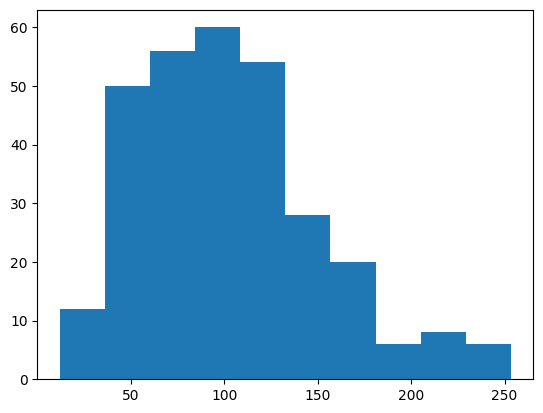

In [150]:
plt.hist(pivot_df.Jul)
plt.show()